In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE


In [2]:
df=pd.read_csv('/content/twitter_validation.csv',header=None,encoding='ISO-8859-1')
df.columns=['ID','Social Media','Target','Review']
df.head()

,ID,Social Media,Target,Review
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [3]:
df.tail()

,ID,Social Media,Target,Review
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
999,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [4]:
df.shape

(1000, 4)

In [5]:
df.size

4000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            1000 non-null   int64 
 1   Social Media  1000 non-null   object
 2   Target        1000 non-null   object
 3   Review        1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [7]:
df.isna().sum()

ID              0
Social Media    0
Target          0
Review          0
dtype: int64

In [8]:
df.dtypes

ID               int64
Social Media    object
Target          object
Review          object
dtype: object

In [9]:
for i in df:
  if df[i].dtype in ['object']:
    print(i.upper(),': ',df[i].value_counts())

SOCIAL MEDIA :  Social Media
RedDeadRedemption(RDR)               40
johnson&johnson                      39
FIFA                                 38
PlayerUnknownsBattlegrounds(PUBG)    38
LeagueOfLegends                      37
ApexLegends                          36
TomClancysRainbowSix                 35
Nvidia                               35
GrandTheftAuto(GTA)                  35
Amazon                               34
Fortnite                             34
Facebook                             33
PlayStation5(PS5)                    33
AssassinsCreed                       33
Borderlands                          33
Overwatch                            32
Hearthstone                          32
Verizon                              32
CS-GO                                32
CallOfDuty                           31
Cyberpunk2077                        30
WorldOfCraft                         30
MaddenNFL                            29
Microsoft                            28
Dota2      

In [10]:
df['Social Media'].value_counts()

Social Media
RedDeadRedemption(RDR)               40
johnson&johnson                      39
FIFA                                 38
PlayerUnknownsBattlegrounds(PUBG)    38
LeagueOfLegends                      37
ApexLegends                          36
TomClancysRainbowSix                 35
Nvidia                               35
GrandTheftAuto(GTA)                  35
Amazon                               34
Fortnite                             34
Facebook                             33
PlayStation5(PS5)                    33
AssassinsCreed                       33
Borderlands                          33
Overwatch                            32
Hearthstone                          32
Verizon                              32
CS-GO                                32
CallOfDuty                           31
Cyberpunk2077                        30
WorldOfCraft                         30
MaddenNFL                            29
Microsoft                            28
Dota2                      

<Figure size 2500x2500 with 0 Axes>

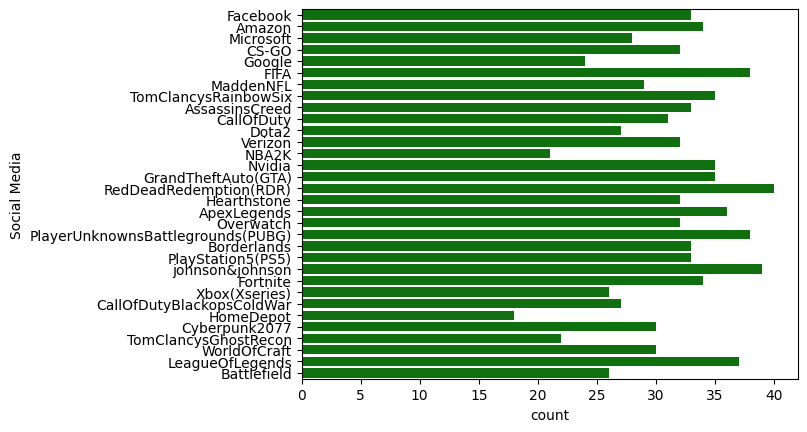

<Figure size 2500x2500 with 0 Axes>

In [11]:
sns.countplot(y='Social Media',data=df,color='g')
plt.figure(figsize=(25,25))

<Figure size 2500x2500 with 0 Axes>

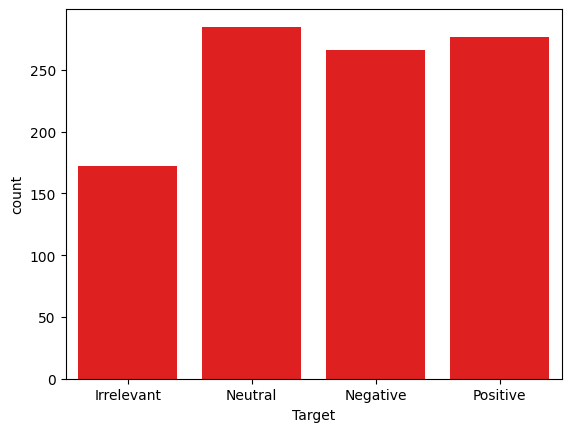

<Figure size 2500x2500 with 0 Axes>

In [12]:
sns.countplot(x='Target',data=df,color='r')
plt.figure(figsize=(25,25))

In [13]:
df.drop(df.index[df['Target']=='Irrelevant'],axis=0,inplace=True)
df

,ID,Social Media,Target,Review
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [14]:
df.reset_index(drop=True,inplace=True)
df

,ID,Social Media,Target,Review
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
823,314,Amazon,Negative,Please explain how this is possible! How can t...
824,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
825,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
826,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [15]:
df['Target'].value_counts()

Target
Neutral     285
Positive    277
Negative    266
Name: count, dtype: int64

In [16]:
df.shape

(828, 4)

<Figure size 2500x2500 with 0 Axes>

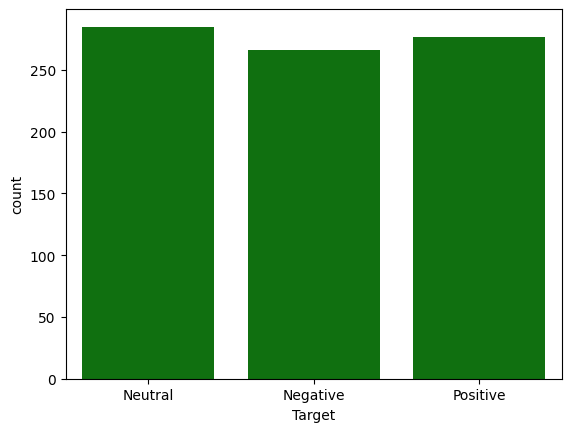

<Figure size 2500x2500 with 0 Axes>

In [17]:
sns.countplot(x='Target',data=df,color='g')
plt.figure(figsize=(25,25))

In [18]:
df.drop(['Social Media','ID'],axis=1,inplace=True)
df

,Target,Review
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so itâs time to drink wine n pl...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [19]:
#map function map the value with the datatype reduce the drwback of replace.
df['Target']=df['Target'].map({'Positive':1,'Negative':-1,'Neutral':0})
df.dtypes

Target     int64
Review    object
dtype: object

In [20]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
tweets=df.Review
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâve had Madeleine McCann in my c...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so itâs time to drink wine n pl...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: Review, Length: 828, dtype: object

In [22]:
#tokenization
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
tweets=tweets.apply(lambda x:tk.tokenize(x)).apply(lambda x: " ".join(x))
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâ   ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible ! How can ...
824    Good on Sony . As much as I want to see the ne...
825    Today sucked so itâ   s time to drink wine n...
826    Bought a fraction of Microsoft today . Small w...
827    Johnson & Johnson to stop selling talc baby po...
Name: Review, Length: 828, dtype: object

In [23]:
#REMOVE SPECIAL CHARACTERS
import re
tweets=tweets.str.replace('[^a-zA-Z0-9]',' ',regex=True)
tweets

0      BBC News   Amazon boss Jeff Bezos rejects clai...
1       Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi  EAHelp I      ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible   How can ...
824    Good on Sony   As much as I want to see the ne...
825    Today sucked so it      s time to drink wine n...
826    Bought a fraction of Microsoft today   Small w...
827    Johnson   Johnson to stop selling talc baby po...
Name: Review, Length: 828, dtype: object

In [24]:
# #Tokens whose Length>=3 is collected

from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
tweets=tweets.apply(lambda x: ' '.join([i for i in tk.tokenize(x) if len(i)>=3]))
tweets

0      BBC News Amazon boss Jeff Bezos rejects claims...
1      Microsoft Why pay for WORD when functions poor...
2      CSGO matchmaking full closet hacking truly awf...
3      Now the President slapping Americans the face ...
4      EAHelp had Madeleine McCann cellar for the pas...
                             ...                        
823    Please explain how this possible How can they ...
824    Good Sony much want see the new PS5 what going...
825    Today sucked time drink wine play borderlands ...
826           Bought fraction Microsoft today Small wins
827    Johnson Johnson stop selling talc baby powder ...
Name: Review, Length: 828, dtype: object

In [25]:
# #Stemming
from nltk.stem import SnowballStemmer
stemer=SnowballStemmer('english')
tweets=tweets.apply(lambda x:[stemer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay for word when function poor ...
2           csgo matchmak full closet hack truli aw game
3      now the presid slap american the face that rea...
4      eahelp had madelein mccann cellar for the past...
                             ...                        
823    pleas explain how this possibl how can they le...
824    good soni much want see the new ps5 what go ri...
825    today suck time drink wine play borderland unt...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder and...
Name: Review, Length: 828, dtype: object

In [26]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
tweets=tweets.apply(lambda x:[i for i in tk.tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay word function poor samsungus...
2           csgo matchmak full closet hack truli aw game
3      presid slap american face realli commit unlaw ...
4      eahelp madelein mccann cellar past year littl ...
                             ...                        
823    pleas explain possibl let compani overcharg sc...
824    good soni much want see new ps5 go right much ...
825    today suck time drink wine play borderland sun...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder can...
Name: Review, Length: 828, dtype: object

In [27]:
#vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data=vec.fit_transform(tweets)
data

<828x3763 sparse matrix of type '<class 'numpy.float64'>'
	with 10461 stored elements in Compressed Sparse Row format>

In [28]:
print(data)

  (0, 668)	0.2608257828483461
  (0, 982)	0.2608257828483461
  (0, 1108)	0.23509805002803952
  (0, 1976)	0.13277165480466424
  (0, 286)	0.22681557001542715
  (0, 838)	0.17354914655342313
  (0, 785)	0.21432663830218204
  (0, 2741)	0.2608257828483461
  (0, 545)	0.2608257828483461
  (0, 1813)	0.24577602391989378
  (0, 610)	0.22681557001542715
  (0, 353)	0.1515362387424402
  (0, 2267)	0.38864111655856126
  (0, 515)	0.49155204783978756
  (1, 775)	0.4055823664694651
  (1, 2871)	0.4055823664694651
  (1, 2538)	0.3821800909185634
  (1, 1383)	0.4055823664694651
  (1, 3659)	0.36557591217188057
  (1, 2442)	0.3126902562590763
  (1, 3619)	0.26216072802580975
  (1, 2135)	0.24555654927912696
  (2, 1405)	0.1689251539717079
  (2, 463)	0.36574263611909275
  (2, 3412)	0.36574263611909275
  :	:
  (825, 3373)	0.3395996844494919
  (825, 3363)	0.2560582225152134
  (825, 608)	0.22981061112100945
  (825, 975)	0.2315686698425631
  (825, 3353)	0.21750175079084832
  (825, 3206)	0.2904718522758868
  (825, 2507)	0.17

In [29]:
data.shape

(828, 3763)

In [30]:
y=df['Target'].values
y

array([ 0, -1, -1,  0, -1,  1,  1,  1, -1,  1,  1, -1,  0, -1,  1,  1, -1,
        1, -1, -1,  0, -1,  0,  0, -1, -1,  1,  1, -1,  1, -1,  0,  0,  1,
        0,  1,  0,  0,  0,  1,  0, -1, -1, -1,  0,  1, -1, -1,  1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  0, -1,  0, -1,  1, -1, -1,  1,  1,  1,
        0,  0,  0,  1,  1,  0,  1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1,
        0,  1,  0, -1,  1,  1,  0,  1,  0,  1, -1,  0,  0,  0, -1,  0, -1,
        0,  0,  1,  1,  0, -1, -1,  1, -1,  0, -1,  1,  0, -1,  0,  1,  0,
        1,  1,  0,  0,  0,  0,  1,  0,  1,  1, -1,  0,  0,  0,  0, -1,  0,
        1, -1,  0, -1,  0, -1, -1, -1,  1,  1,  1,  0,  0,  1,  0,  0,  0,
        1,  0, -1, -1,  0,  1,  1,  0,  1,  1,  0,  0, -1, -1, -1, -1,  1,
        0,  0,  1,  1,  1,  1, -1,  1,  1,  0, -1, -1, -1,  1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  0, -1,  0,  0,  1, -1,  1,  1,  0,  1,
       -1, -1,  1,  1,  1,  1,  0,  0,  1, -1,  0,  1,  0, -1,  0,  0, -1,
        1,  1, -1,  0,  1

In [31]:
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.3,random_state=1)
y_train

array([ 0, -1, -1,  0,  1, -1,  1,  0,  0, -1, -1,  1,  0, -1, -1,  1, -1,
       -1,  0, -1,  1, -1,  0, -1,  0,  1,  1,  0,  1, -1, -1,  0,  0,  0,
        1, -1,  0, -1,  0,  1,  1,  0,  0, -1,  1,  1, -1, -1,  1,  0,  0,
       -1,  0,  1, -1,  0, -1,  0,  1, -1, -1,  1,  0, -1,  1,  1,  1, -1,
       -1,  0, -1,  1,  1,  1,  0, -1,  0, -1,  0, -1,  0, -1,  1,  1,  1,
       -1,  1,  0,  0,  1,  0,  0, -1,  1,  1,  0,  0,  0,  0, -1,  1,  0,
       -1,  0,  1,  1,  0, -1,  1,  1,  0,  1, -1,  1, -1, -1,  1,  1,  1,
       -1,  1,  1, -1,  0,  1,  1,  1,  0, -1,  1,  0,  0,  0, -1,  0,  0,
       -1,  0,  0,  1,  1, -1,  0,  1,  1,  0,  0,  1,  1,  1, -1, -1,  0,
       -1, -1, -1, -1, -1,  0,  0, -1,  1, -1,  0, -1, -1,  0, -1, -1,  0,
        1,  0, -1, -1,  0, -1,  1,  0,  1,  0,  0,  0,  1,  0,  1,  0,  1,
       -1,  0,  0, -1,  0,  0,  1,  0,  1, -1, -1, -1,  0,  1,  0, -1,  0,
       -1, -1,  0,  1, -1,  1,  1,  0,  1,  1, -1,  0,  1, -1, -1,  1,  0,
        1,  1, -1,  0, -1

In [32]:
#knn#naivebayes#svm#dt#rf
knn=KNeighborsClassifier()
sv=SVC()
nav=MultinomialNB()
dtree=DecisionTreeClassifier()
rforest=RandomForestClassifier()
lst=[knn,sv,nav,dtree,rforest]
for i in lst:
  print('Model started')
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("Predicted value is: ",y_pred)
  cm=confusion_matrix(y_test,y_pred)
  print('Confusion matrix is: ')
  print(cm)
  score=accuracy_score(y_test,y_pred)
  print('Accuracy score is: ',score*100,'%')

Model started
KNeighborsClassifier()
Predicted value is:  [ 0 -1  0  1 -1 -1 -1  0  1 -1  0 -1  0  0 -1  0  0 -1  1 -1  1  1 -1  1
 -1  0  0  1 -1 -1  0 -1  0  0 -1 -1 -1 -1 -1  1  0 -1  1 -1 -1  1 -1 -1
 -1  0  0 -1 -1 -1  0 -1 -1  1 -1 -1 -1  0 -1  0 -1  0 -1 -1 -1 -1 -1  1
 -1 -1 -1 -1  1 -1 -1  1 -1  0 -1 -1 -1 -1 -1 -1 -1  0 -1 -1  0 -1  0 -1
  1 -1  0 -1 -1 -1 -1 -1  0 -1 -1 -1  1  0 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1  0 -1  0  0 -1 -1 -1  0  1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1  1 -1 -1  0 -1  0 -1  1 -1 -1 -1  1 -1  0 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1  0 -1  0 -1  1 -1 -1 -1 -1 -1  0 -1  1 -1 -1  1 -1 -1  0  0
 -1  0 -1  0 -1 -1 -1 -1 -1 -1  0  0 -1 -1 -1  0  0  0 -1 -1 -1  0  1 -1
 -1 -1 -1 -1 -1 -1  0 -1 -1  1  1 -1 -1  0 -1  0  0 -1 -1  0 -1  1 -1  0
 -1 -1  0 -1  1  1 -1 -1  0]
Confusion matrix is: 
[[64  6  4]
 [49 36  6]
 [48 13 23]]
Accuracy score is:  49.39759036144578 %
Model started
SVC()
Predicted value is:  [ 0 -1  0  1 -1 -1  0  0  1  1  0  0  0  0 

# **Hyper Parameter Tunning**

In [33]:
#KNN
gs=GridSearchCV(KNeighborsClassifier(),{'n_neighbors':[i for i in range(1,30,2)],'weights':['uniform','distance']},cv=10)
gs.fit(data,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29],
                         'weights': ['uniform', 'distance']})

In [34]:
gs.best_params_

{'n_neighbors': 21, 'weights': 'distance'}

In [35]:
gs.best_score_

0.58696738172201

In [36]:
gs1=GridSearchCV(SVC(),{'kernel':['linear','poly','rbf'],'C':[i for i in range(100)]},cv=5)
gs1.fit(data,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_par

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                               15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
                               27, 28, 29, ...],
                         'kernel': ['linear', 'poly', 'rbf']})

In [39]:
gs1.best_params_

{'C': 1, 'kernel': 'rbf'}

In [40]:
gs1.best_score_

0.6014895947426068